In [ ]:
!pip install imblearn xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.4/201.4 MB 5.0 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from collections import Counter
from imblearn.under_sampling import NearMiss
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from xgboost import XGBClassifier

sns.set()

# Read Data

In [ ]:
path_diabetes = "/content/drive/Othercomputers/My MacBook Air/Documents/MAIA/Semester_IV/Proyecto_I/Proyecto_Curso/data.csv"
data_raw = pd.read_csv(path_diabetes)

In [ ]:
data_raw.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
data_raw.shape

(253680, 22)

In [ ]:
data_raw.isna().sum().sum()

0

In [ ]:
data_raw.duplicated().sum()

23899

In [ ]:
data = data_raw.copy()

In [ ]:
data = data.rename(columns={'Diabetes_012': 'Diabetes'})
data.loc[data['Diabetes'] == 1, 'Diabetes'] = 0
data.loc[data['Diabetes'] == 2, 'Diabetes'] = 1

In [ ]:
data = data.drop_duplicates().reset_index(drop=True)

In [ ]:
data.head()

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
data.iloc[:, :11].describe()

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies
count,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.00000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000
mean,0.152945,0.454343,0.441640,0.959481,28.687507,0.46580,0.044816,0.103336,0.733042,0.612675,0.794587
std,0.359936,0.497912,0.496584,0.197173,6.789204,0.49883,0.206899,0.304398,0.442371,0.487140,0.404004
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.00000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.iloc[:, 11:].describe()

,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000
mean,0.060791,0.946011,0.092921,2.601820,3.509866,4.681219,0.185751,0.439087,8.085068,4.979741,5.888615
std,0.238947,0.225996,0.290323,1.064962,7.717643,9.050877,0.388906,0.496277,3.094451,0.992989,2.092888
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,4.000000
50%,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,0.000000,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
data['Diabetes'].value_counts()

,count
Diabetes,
0.0,194377
1.0,35097


# Descriptive Analysis

In [ ]:
numerical_features = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
categorical_features = list(data.drop(numerical_features, axis=1).columns)

## Categorical Features

Diabetes
0    213703
1      4631
2     35346
Name: count, dtype: int64



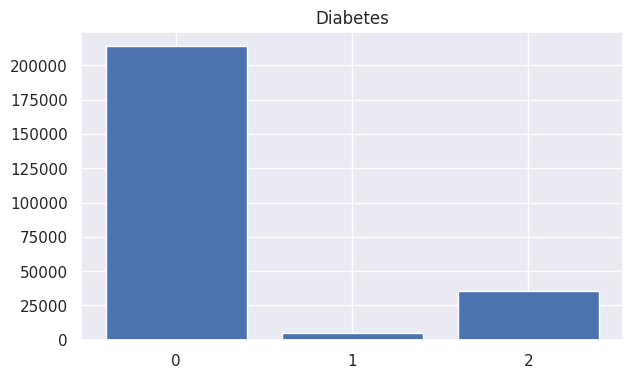


HighBP
0    144851
1    108829
Name: count, dtype: int64



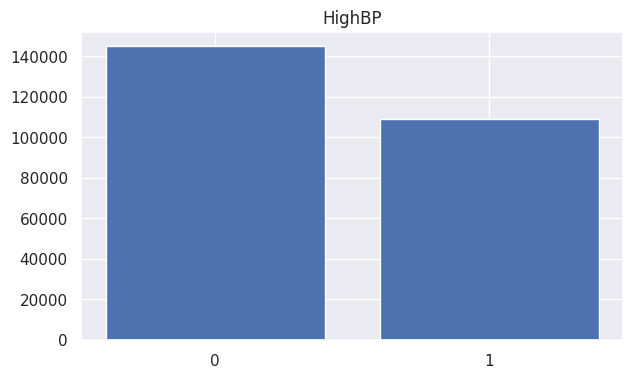


HighChol
0    146089
1    107591
Name: count, dtype: int64



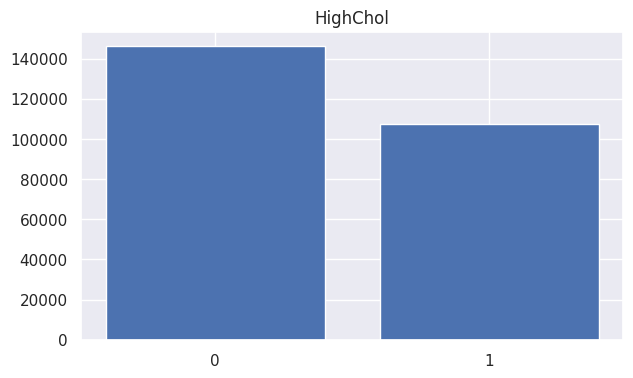


CholCheck
0      9470
1    244210
Name: count, dtype: int64



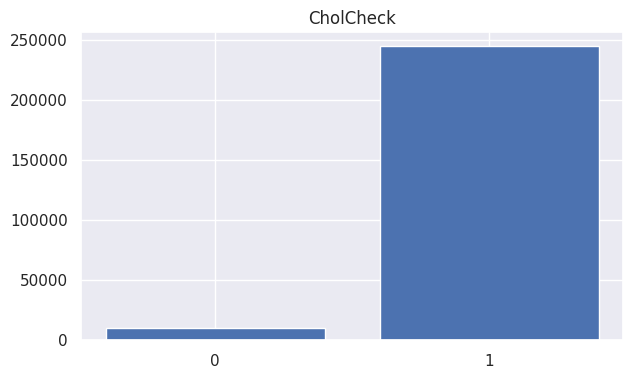


Smoker
0    141257
1    112423
Name: count, dtype: int64



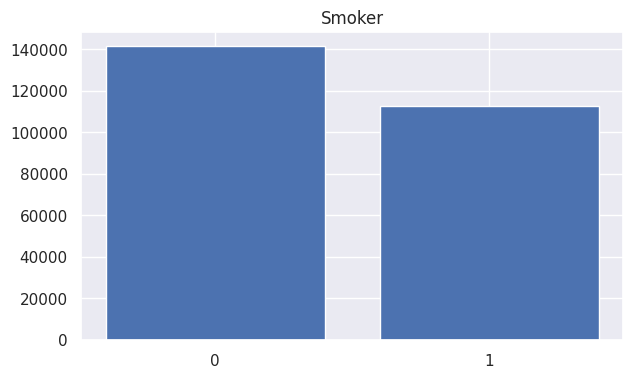


Stroke
0    243388
1     10292
Name: count, dtype: int64



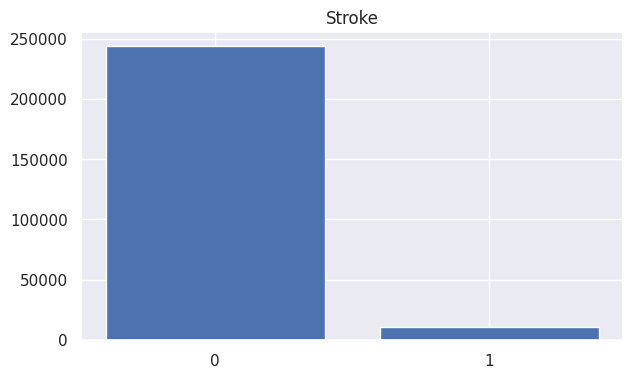


HeartDiseaseorAttack
0    229787
1     23893
Name: count, dtype: int64



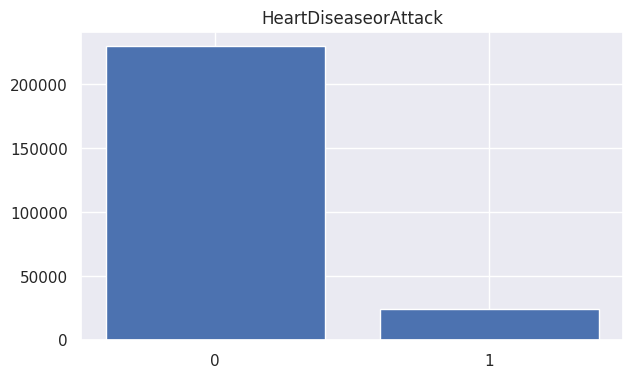


PhysActivity
0     61760
1    191920
Name: count, dtype: int64



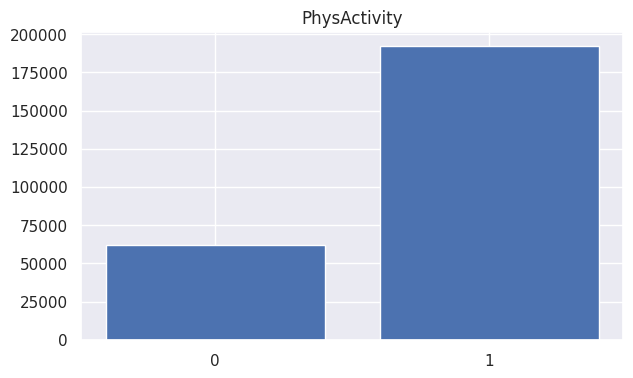


Fruits
0     92782
1    160898
Name: count, dtype: int64



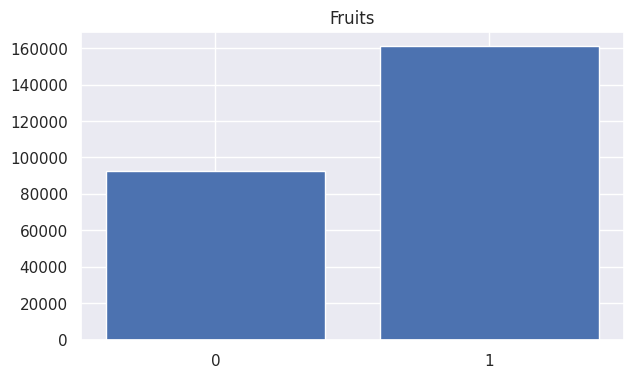


Veggies
0     47839
1    205841
Name: count, dtype: int64



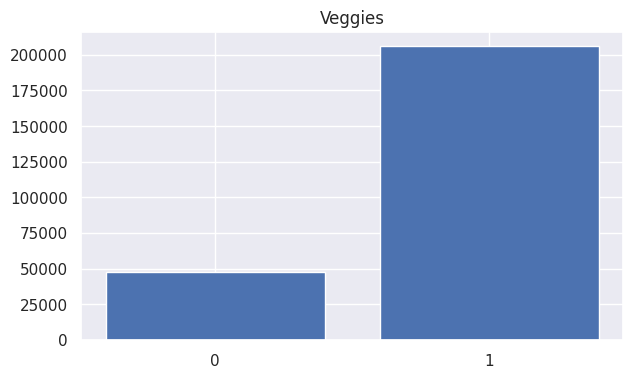


HvyAlcoholConsump
0    239424
1     14256
Name: count, dtype: int64



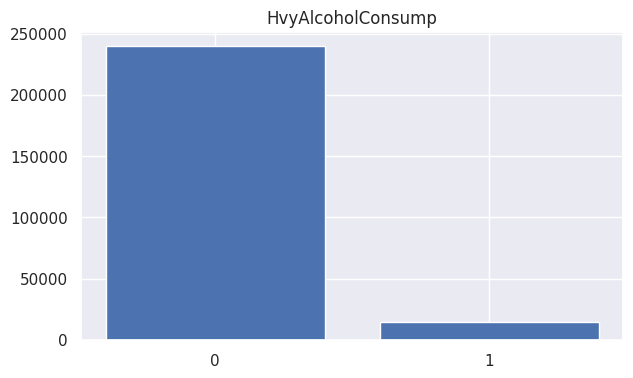


AnyHealthcare
0     12417
1    241263
Name: count, dtype: int64



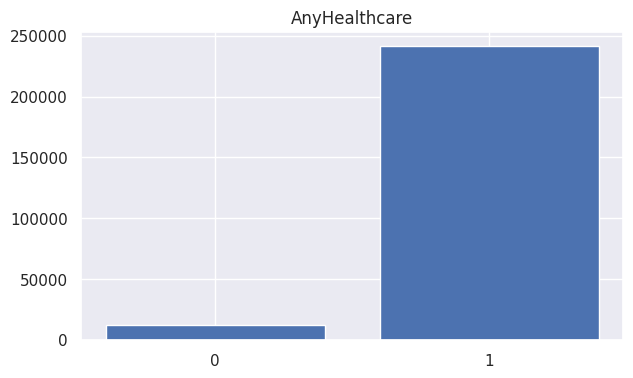


NoDocbcCost
0    232326
1     21354
Name: count, dtype: int64



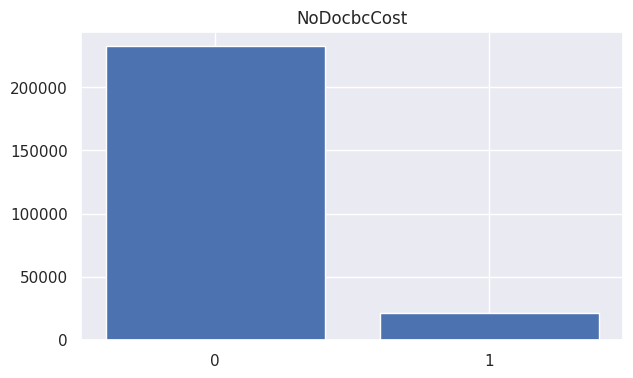


DiffWalk
0    211005
1     42675
Name: count, dtype: int64



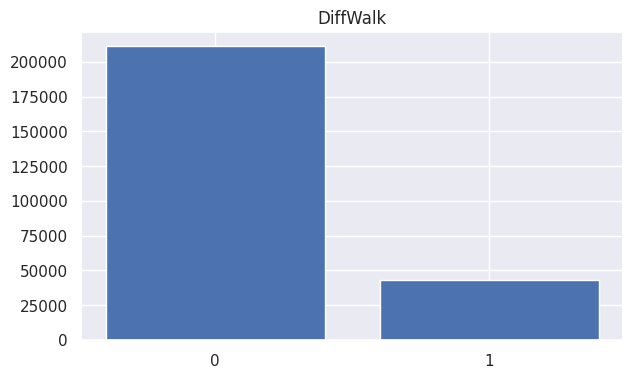


Sex
0    141974
1    111706
Name: count, dtype: int64



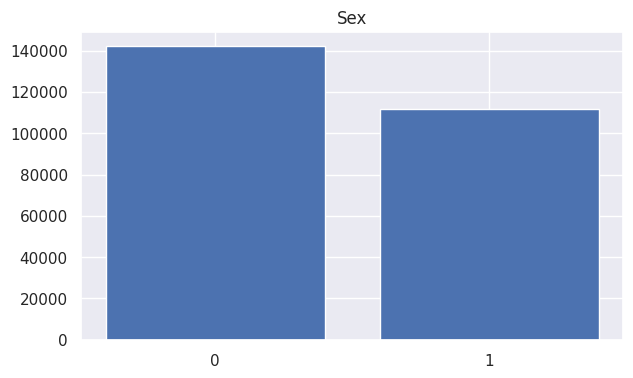

In [ ]:
for c in categorical_features:

    print(data[c].astype(int).value_counts().sort_index())
    print("")

    plt.figure(figsize=(7, 4))
    y = data[c].value_counts().sort_index()
    x = y.index.astype(int).astype(str)
    plt.bar(x, y)
    plt.title(c)
    plt.show()

    print("")

## Numerical Features

BMI
count    253680.000000
mean         28.382364
std           6.608694
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          98.000000
Name: BMI, dtype: float64



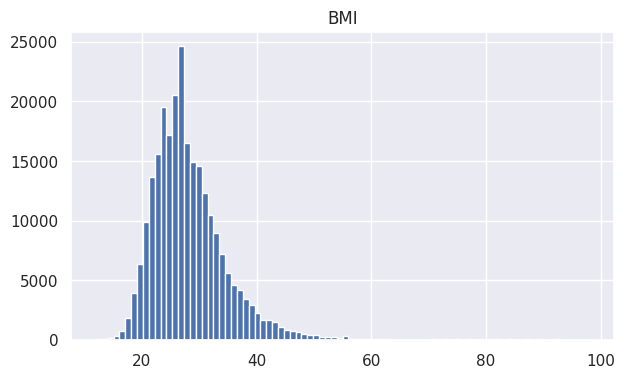


GenHlth
count    253680.000000
mean          2.511392
std           1.068477
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           5.000000
Name: GenHlth, dtype: float64



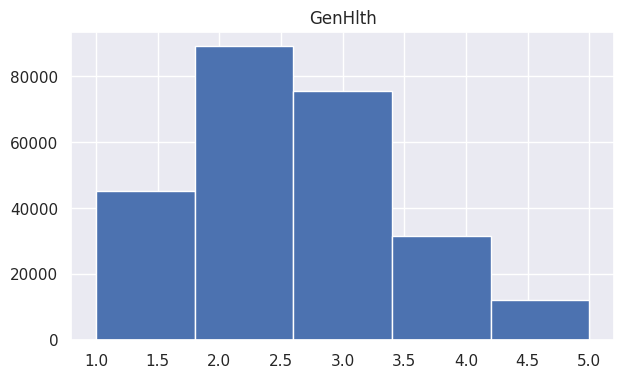


MentHlth
count    253680.000000
mean          3.184772
std           7.412847
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          30.000000
Name: MentHlth, dtype: float64



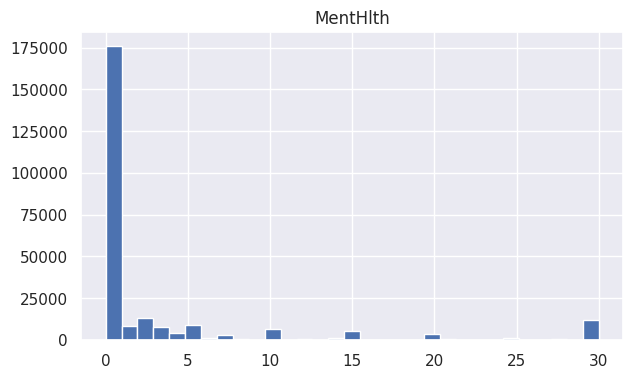


PhysHlth
count    253680.000000
mean          4.242081
std           8.717951
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          30.000000
Name: PhysHlth, dtype: float64



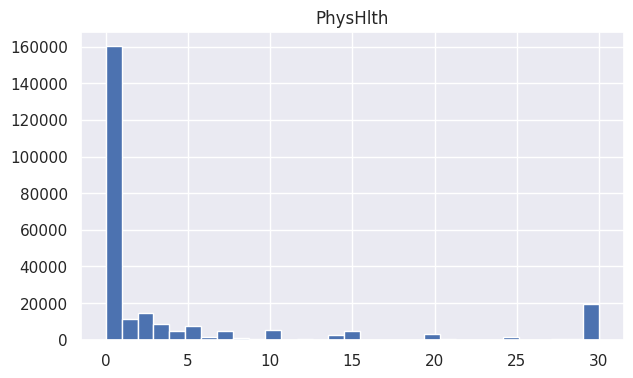


Age
count    253680.000000
mean          8.032119
std           3.054220
min           1.000000
25%           6.000000
50%           8.000000
75%          10.000000
max          13.000000
Name: Age, dtype: float64



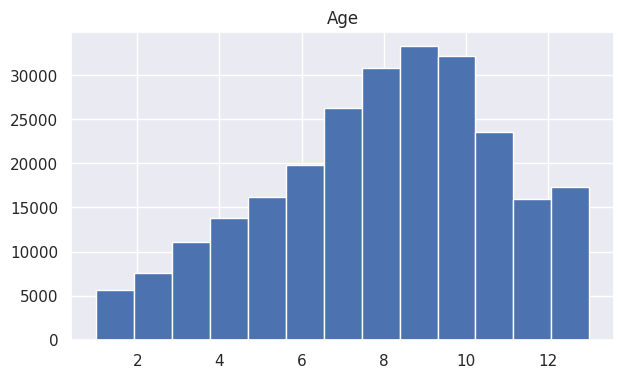


Education
count    253680.000000
mean          5.050434
std           0.985774
min           1.000000
25%           4.000000
50%           5.000000
75%           6.000000
max           6.000000
Name: Education, dtype: float64



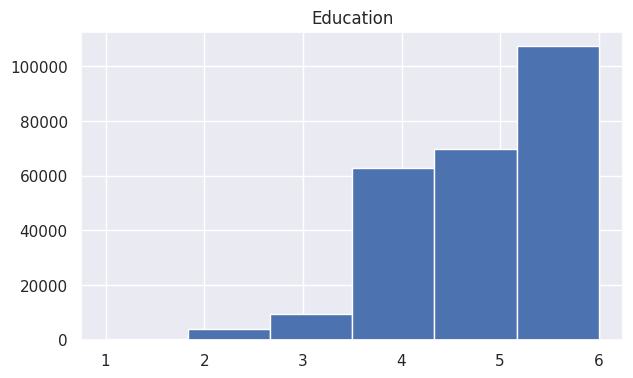


Income
count    253680.000000
mean          6.053875
std           2.071148
min           1.000000
25%           5.000000
50%           7.000000
75%           8.000000
max           8.000000
Name: Income, dtype: float64



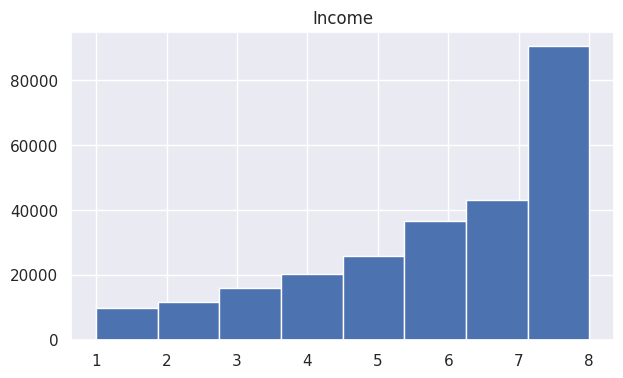

In [ ]:
for c in numerical_features:

    print(f"{c}")
    print(data[c].describe())
    print("")

    plt.figure(figsize=(7, 4))
    x = data[c]
    plt.hist(x, bins=len(x.unique().astype(int)))
    plt.title(c)
    plt.show()

    print("")

## Correlation Matrix

In [ ]:
sns.__version__

'0.13.2'

In [ ]:
matrix = data[numerical_features].corr()

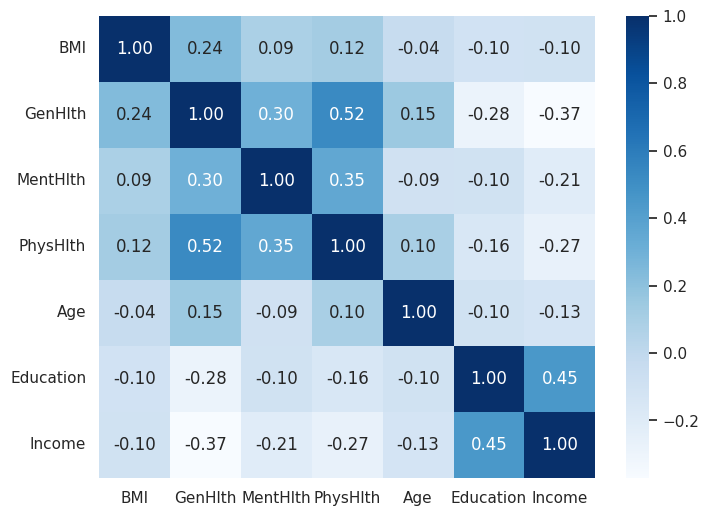

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, cmap='Blues', annot=True, fmt='.2f')
plt.show()

In [ ]:
# profile = ProfileReport(data, title='Diabetes Factors')

In [ ]:
# profile.to_file("diabetes_factors.html")

# Model Fit

## Data Preparation

In [ ]:
#numerical_features = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
#binary_features = list(X.drop(numerical_features, axis=1).columns)

In [ ]:
X = data.drop(['Diabetes'], axis=1)
y = data['Diabetes']

In [ ]:
nm = NearMiss(n_neighbors=10)
X_res, y_res = nm.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

In [ ]:
#print(encoder.classes_)
#print(encoder.inverse_transform([0, 1, 2]))

## Logistic Regression

In [ ]:
reglog = LogisticRegression(random_state=42)

param_grid = {
    'C': [0.1, 0.5, 1.0, 5.0],
    'solver': ['lbfgs', 'newton-cg', 'liblinear'],
    'class_weight': [None, 'balanced']
}

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
grid = GridSearchCV(reglog, param_grid, cv=kfold, scoring='f1_macro', n_jobs=-1)

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1.0, 5.0],
                         'class_weight': [None, 'balanced'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear']},
             scoring='f1_macro')

In [ ]:
print("Mejor configuración:\n{}\n".format(grid.best_params_))
print("Mejor puntaje de validación cruzada: {:.4f}".format(grid.best_score_))

Mejor configuración:
{'C': 1.0, 'class_weight': None, 'solver': 'newton-cg'}

Mejor puntaje de validación cruzada: 0.8506


In [ ]:
model = grid.best_estimator_
model

LogisticRegression(random_state=42, solver='newton-cg')

In [ ]:
list(zip(X_train.columns, model.coef_[0]))

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.93      0.86      7012
         1.0       0.92      0.77      0.84      7027

    accuracy                           0.85     14039
   macro avg       0.86      0.85      0.85     14039
weighted avg       0.86      0.85      0.85     14039



## XGBoost

In [ ]:
#class_counts = Counter(y_train)
#total_count = sum(class_counts.values())
#weights = {k: total_count / (len(class_counts) * v) for k, v in class_counts.items()}

#cale_pos_weight = [weights[i] for i in range(len(class_counts))]

In [ ]:
class_counts = np.bincount(y_train)
total_samples = len(y_train)
class_weights = total_samples / (len(class_counts) * class_counts)
sample_weights = np.array([class_weights[label] for label in y_train])

In [ ]:
np.unique(sample_weights, return_counts=True)

(array([0.59028171, 3.26911022]), array([136063,  24568]))

In [ ]:
xgb = XGBClassifier(
    n_estimators=100,
    objective='binary:logistic',
    eval_metric='logloss'
)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, 8],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 2, 5]
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
grid = GridSearchCV(xgb, param_grid, cv=cv, scoring='f1_macro', n_jobs=-1)

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=Non...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 2, 5], 'max_depth': [2, 4, 6, 8],
                         'min_child_weight': [1, 3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='f1_macro')

In [ ]:
print("Mejor configuración:\n{}\n".format(grid.best_params_))
print("Mejor puntaje de validación cruzada: {:.4f}".format(grid.best_score_))

Mejor configuración:
{'gamma': 0, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 200}

Mejor puntaje de validación cruzada: 0.8701


In [ ]:
model = grid.best_estimator_

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88      7012
         1.0       0.94      0.79      0.86      7027

    accuracy                           0.87     14039
   macro avg       0.88      0.87      0.87     14039
weighted avg       0.88      0.87      0.87     14039



## MLP

In [ ]:
data = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")

In [ ]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
data['Diabetes_binary'].value_counts()

,count
Diabetes_binary,
0.0,218334
1.0,35346


In [ ]:
X = data.drop(['Diabetes_binary'], axis=1)
y = data['Diabetes_binary']

In [ ]:
nm = NearMiss(version=1, n_neighbors=10)
X_res, y_res = nm.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [ ]:
clf_mlp = MLPClassifier(solver='adam', alpha=5e-5, hidden_layer_sizes=(300, 5), random_state=42)
clf_mlp.fit(X_train, y_train)

MLPClassifier(alpha=5e-05, hidden_layer_sizes=(300, 5), random_state=42)

In [ ]:
y_pred = clf_mlp.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90     10601
         1.0       0.95      0.85      0.89     10607

    accuracy                           0.90     21208
   macro avg       0.90      0.90      0.90     21208
weighted avg       0.90      0.90      0.90     21208



In [ ]:
import pickle

with open('model_mlp.pkl','wb') as f:
    pickle.dump(clf_mlp, f)

# Probabilidad de Diabetes

In [ ]:
y_prob = clf_mlp.predict_proba(X_train)[:, 1]

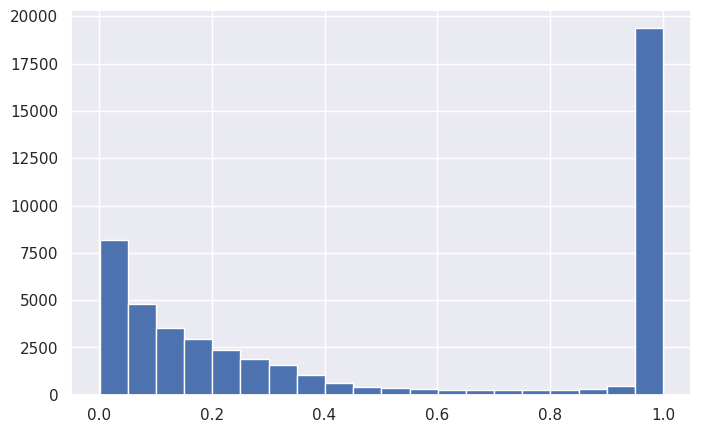

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(y_prob, bins=20)
plt.show()

In [ ]:
df_prob = pd.DataFrame(y_prob, columns=['diabetes_prob'])

In [ ]:
df_prob['risk_level'] = \
    np.where(df_prob['diabetes_prob'] < 0.07, '1',
    np.where(df_prob['diabetes_prob'] < 0.20, '2',
    np.where(df_prob['diabetes_prob'] < 0.35, '3',
    np.where(df_prob['diabetes_prob'] < 0.90, '4', '5'))))

In [ ]:
df_prob.head()

,diabetes_prob,risk_level
0,0.338851,3
1,1.000000,5
2,0.369388,4
3,0.216440,3
4,1.000000,5


In [ ]:
df_prob['risk_level'].value_counts()

,count
risk_level,
5,19813
1,10140
2,9299
3,5865
4,4367


In [ ]:
df_prob.describe(percentiles=[0.2, 0.4, 0.6, 0.8])

,diabetes_prob
count,49484.000000
mean,0.510328
std,0.424138
min,0.001226
20%,0.067522
40%,0.207382
50%,0.330807
60%,0.902443
80%,1.000000
max,1.000000
